In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("uber.csv")
df

FileNotFoundError: [Errno 2] No such file or directory: 'uber.csv'

In [ ]:
df.describe()

,Unnamed: 0,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,2.000000e+05,200000.000000,200000.000000,200000.000000,199999.000000,199999.000000,200000.000000
mean,2.771250e+07,11.359955,-72.527638,39.935885,-72.525292,39.923890,1.684535
std,1.601382e+07,9.901776,11.437787,7.720539,13.117408,6.794829,1.385997
min,1.000000e+00,-52.000000,-1340.648410,-74.015515,-3356.666300,-881.985513,0.000000
25%,1.382535e+07,6.000000,-73.992065,40.734796,-73.991407,40.733823,1.000000
50%,2.774550e+07,8.500000,-73.981823,40.752592,-73.980093,40.753042,1.000000
75%,4.155530e+07,12.500000,-73.967154,40.767158,-73.963658,40.768001,2.000000
max,5.542357e+07,499.000000,57.418457,1644.421482,1153.572603,872.697628,208.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         200000 non-null  int64  
 1   key                200000 non-null  object 
 2   fare_amount        200000 non-null  float64
 3   pickup_datetime    200000 non-null  object 
 4   pickup_longitude   200000 non-null  float64
 5   pickup_latitude    200000 non-null  float64
 6   dropoff_longitude  199999 non-null  float64
 7   dropoff_latitude   199999 non-null  float64
 8   passenger_count    200000 non-null  int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 13.7+ MB


## Dropping NULL values

In [ ]:
df.isnull().sum()

Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64

In [ ]:
df= df.dropna()

In [ ]:
df.isnull().sum()

Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

## Outliers

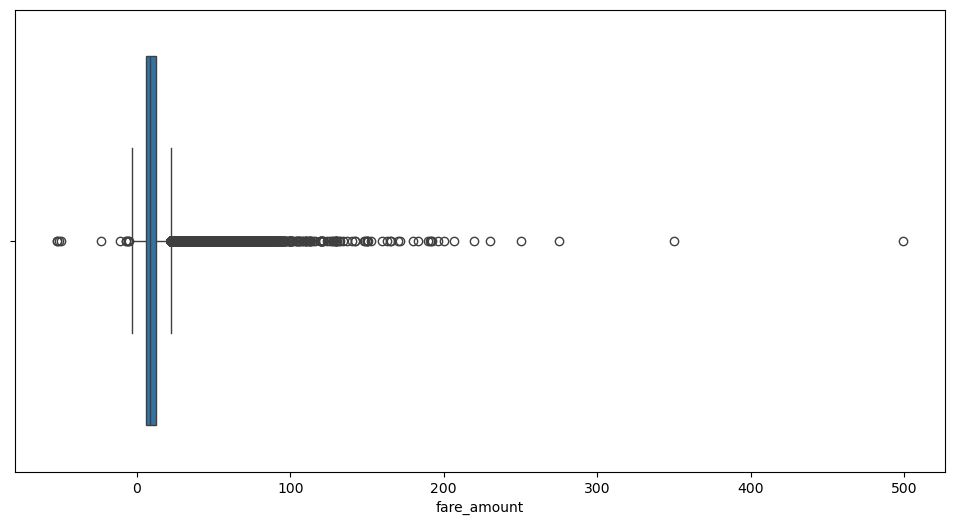

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(x=df['fare_amount'])
plt.show()

In [ ]:
Q1 = df['fare_amount'].quantile(0.25)
Q3 = df['fare_amount'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df = df[(df['fare_amount'] >= lower_bound) & (df['fare_amount'] <= upper_bound)]


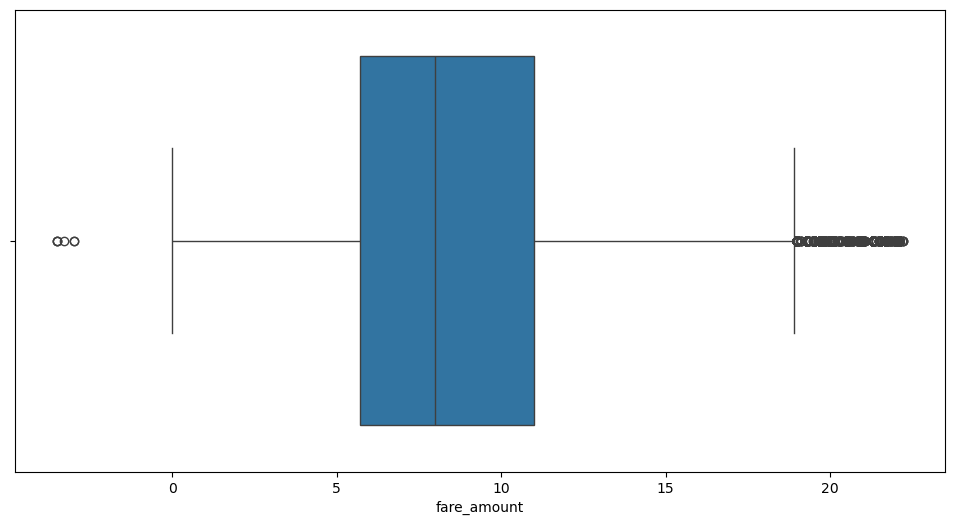

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(x=df['fare_amount'])
plt.show()

## Droping unnesscary columns

In [ ]:
df.drop(columns=["Unnamed: 0","key","pickup_datetime"],axis=1, inplace=True)
df

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,7.5,-73.999817,40.738354,-73.999512,40.723217,1
1,7.7,-73.994355,40.728225,-73.994710,40.750325,1
2,12.9,-74.005043,40.740770,-73.962565,40.772647,1
3,5.3,-73.976124,40.790844,-73.965316,40.803349,3
4,16.0,-73.925023,40.744085,-73.973082,40.761247,5
...,...,...,...,...,...,...
199994,12.0,-73.983070,40.760770,-73.972972,40.754177,1
199995,3.0,-73.987042,40.739367,-73.986525,40.740297,1
199996,7.5,-73.984722,40.736837,-74.006672,40.739620,1
199998,14.5,-73.997124,40.725452,-73.983215,40.695415,1


## Correlation

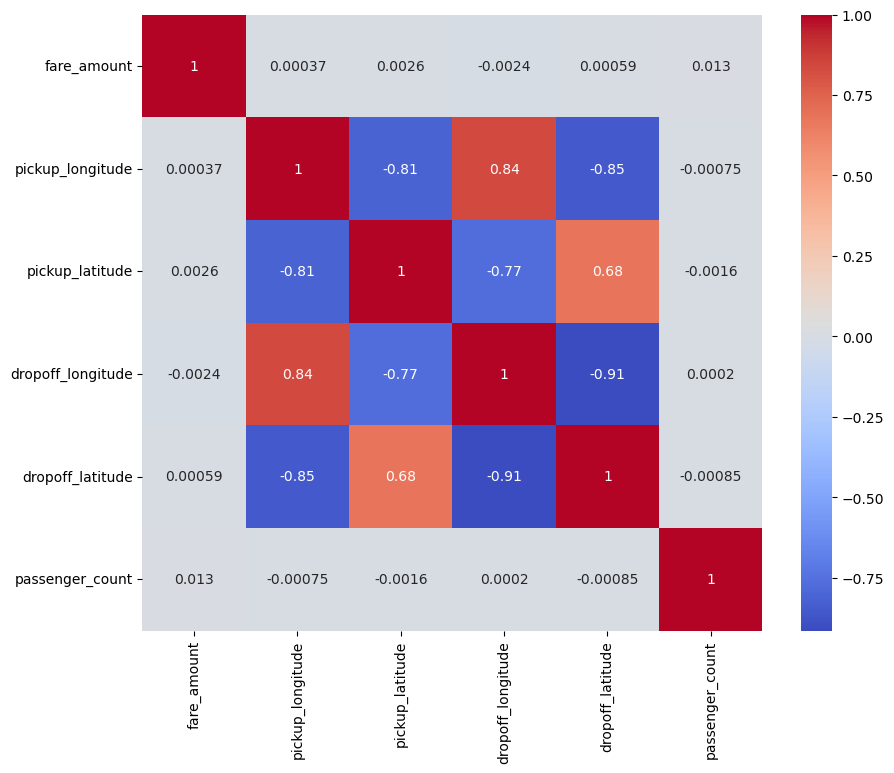

In [ ]:
correlation_matrix = df.corr(numeric_only=True)
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

## Train Test Split

In [ ]:
x= df.drop("fare_amount", axis=1)
x

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,-73.999817,40.738354,-73.999512,40.723217,1
1,-73.994355,40.728225,-73.994710,40.750325,1
2,-74.005043,40.740770,-73.962565,40.772647,1
3,-73.976124,40.790844,-73.965316,40.803349,3
4,-73.925023,40.744085,-73.973082,40.761247,5
...,...,...,...,...,...
199994,-73.983070,40.760770,-73.972972,40.754177,1
199995,-73.987042,40.739367,-73.986525,40.740297,1
199996,-73.984722,40.736837,-74.006672,40.739620,1
199998,-73.997124,40.725452,-73.983215,40.695415,1


In [ ]:
y= df["fare_amount"]
y

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

## LinearRegression

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
LR= LinearRegression()

In [ ]:
LR_model= LR.fit(X_train,y_train)

In [ ]:
LR_preds=LR_model.predict(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
LR_MSE= mean_squared_error(y_test, LR_preds)
LR_MSE

17.272535132318502

In [ ]:
LR_RMSE=LR_MSE**0.5
LR_RMSE

4.156023957139625

In [ ]:
LR_R2= r2_score(y_test, LR_preds)
LR_R2

0.00023847441162450078

## RandomForest

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
RF= RandomForestRegressor()

In [ ]:
RF_model= RF.fit(X_train,y_train)

In [ ]:
RF_preds= RF_model.predict(X_test)

In [ ]:
RF_MSE= mean_squared_error(y_test,RF_preds)
RF_MSE

5.076124951953511

In [ ]:
RF_RMSE=RF_MSE**0.5
RF_RMSE

2.25302573264344